# **구글 드라이브 연동, 압축 해제 등**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd

# HOUSING_PATH = "/content/drive/My Drive/Colab_Notebooks/Deep_learning"

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

# housing = load_housing_data()
# housing.head()

Mounted at /content/drive


In [8]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Colab_Notebooks/Deep_learning/assignment2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training plane pictures
train_1_dir = os.path.join(train_dir, 'planes')

# Directory with our training no plane pictures
train_no_planes_dir = os.path.join(train_dir, 'no_planes')

# Directory with our test plane pictures
test_planes_dir = os.path.join(test_dir, 'planes')

# Directory with our test no plane pictures
test_no_planes_dir = os.path.join(test_dir, 'no_planes')

print(train_1_dir)

/tmp/dataset/train/planes


In [9]:
print('total training planes images:', len(os.listdir(train_1_dir)))
print('total training no_planes images:', len(os.listdir(train_no_planes_dir)))
print('total test planes images:', len(os.listdir(test_planes_dir)))
print('total test no_planes images:', len(os.listdir(test_no_planes_dir)))

total training planes images: 1000
total training no_planes images: 1000
total test planes images: 500
total test no_planes images: 500


# Load image 확인

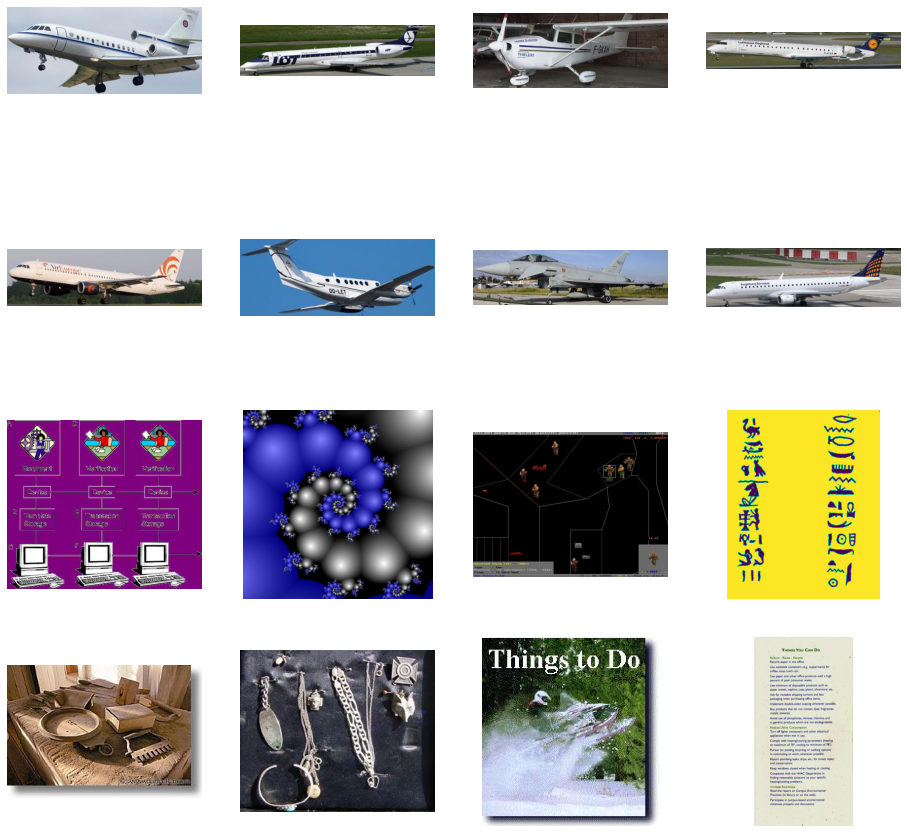

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_plane_pix = [os.path.join(train_planes_dir, fname) 
                for fname in train_plane_fnames[pic_index-8:pic_index]]
next_no_plane_pix = [os.path.join(train_no_planes_dir, fname) 
                for fname in train_no_plane_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_plane_pix+next_no_plane_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# 1번, 150x150으로 변경

In [ ]:
import tensorflow as tf
from tensorflow import keras

################################
batch_size = 32
num_of_train_imgs = 2000
num_of_test_imgs = 1000
img_height = 150
img_width = 150

################################

# Train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=num_of_train_imgs)

# Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=num_of_train_imgs)

# Test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=num_of_test_imgs)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['no_planes', 'planes']


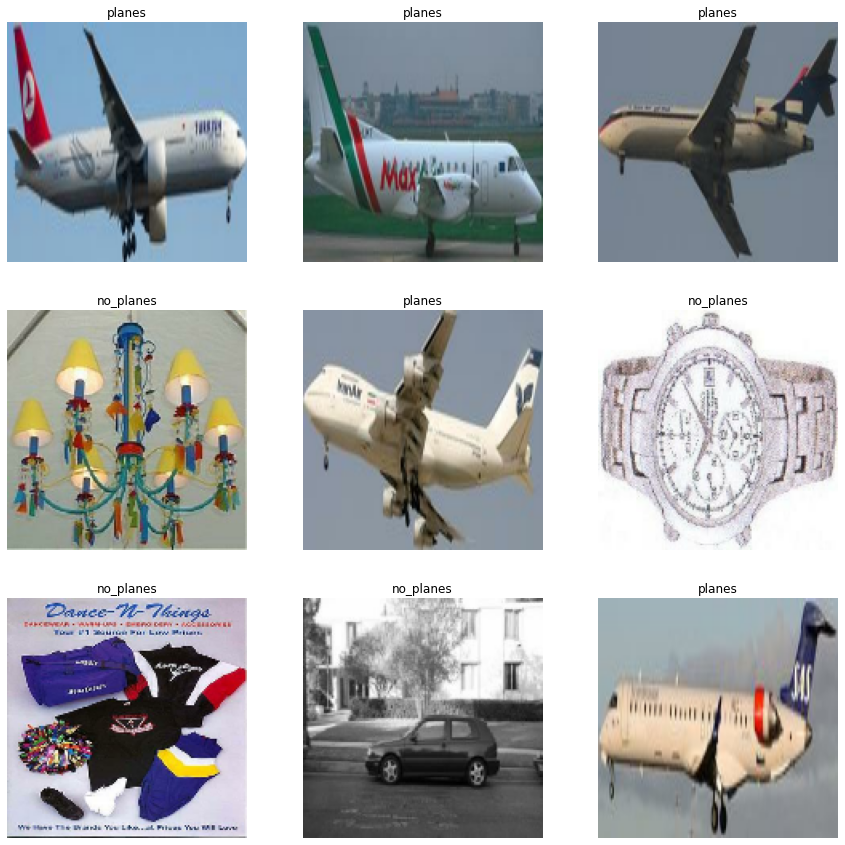

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# 2번 Data_augmentation 적용 (aug_ds)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

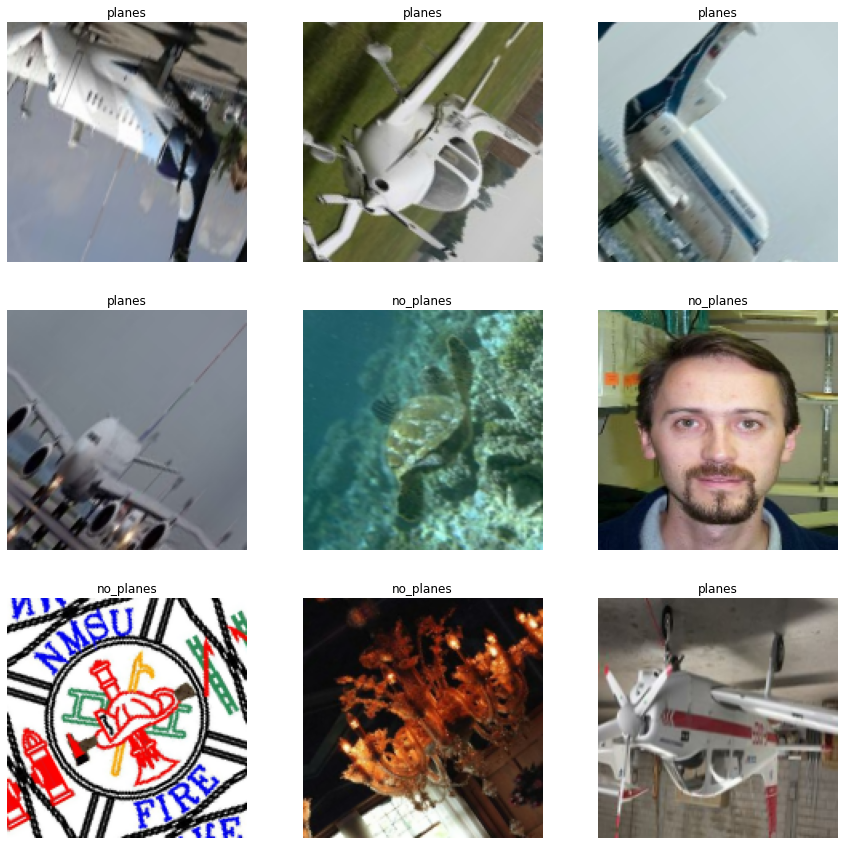

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    augmented_image = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (data_augmentation(images), y))

In [ ]:
print(type(aug_ds))

for image_batch, labels_batch in aug_ds:
  # image_batch: tensors of shape (batch_size, image_size[0], image_size[1], num_channels)
  Xtr = image_batch.numpy()
  print(Xtr.shape)
  # labels_batch: the labels are an int32 tensor of shape (batch_size,)
  Ytr = labels_batch.numpy()
  print(Ytr.shape) 
  break


# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], img_height * img_width * 3) # Xtr_rows becomes 1600 x (50 x 50 x 3 = 7500)
print(Xtr_rows.shape)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
(1600, 150, 150, 3)
(1600,)
(1600, 67500)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr_rows, Ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
for image_batch, labels_batch in test_ds:
  # image_batch: tensors of shape (batch_size, image_size[0], image_size[1], num_channels)
  Xte = image_batch.numpy()
  print(Xte.shape)
  # labels_batch: the labels are an int32 tensor of shape (batch_size,)
  Yte = labels_batch.numpy()
  print(Yte.shape) 
  break

# flatten out all images to be one-dimensional
Xte_rows = Xte.reshape(Xte.shape[0], img_height * img_width * 3) # Xtr_rows becomes 1000 x (50 x 50 x 3 = 7500)
print(Xte_rows.shape)

(1000, 150, 150, 3)
(1000,)
(1000, 67500)


In [ ]:
#check accuracy of our model on the test data
knn.score(Xte_rows, Yte)

0.413

# Model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 50x50x3: 50x50 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

# 3-1번 RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 50x50
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=test_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
125/125 [==============================] - 52s 414ms/step - loss: 0.5034 - acc: 0.8120 - val_loss: 0.3507 - val_acc: 0.8390
Epoch 2/10
125/125 [==============================] - 51s 407ms/step - loss: 0.2418 - acc: 0.9045 - val_loss: 0.3932 - val_acc: 0.8500
Epoch 3/10
125/125 [==============================] - 51s 408ms/step - loss: 0.1769 - acc: 0.9340 - val_loss: 0.2092 - val_acc: 0.9280
Epoch 4/10
125/125 [==============================] - 51s 410ms/step - loss: 0.1257 - acc: 0.9540 - val_loss: 0.1847 - val_acc: 0.9220
Epoch 5/10
125/125 [==============================] - 51s 408ms/step - loss: 0.0967 - acc: 0.9680 - val_loss: 0.2930 - val_acc: 0.9050
Epoch 6/10
125/125 [==============================] - 51s 408ms/step - loss: 0.0739 - acc: 0.9800 - val_loss: 0.2244 - val_acc: 0.9270
Epoch 7/10
125/125 [==============================] - 51s 410ms/step - loss: 0.0483 - acc: 0.9815 - val_loss: 0.3066 - val_acc: 0.9410
Epoch 8/10
125/125 [==============================] - 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


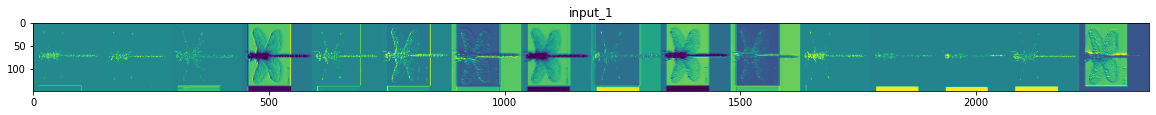

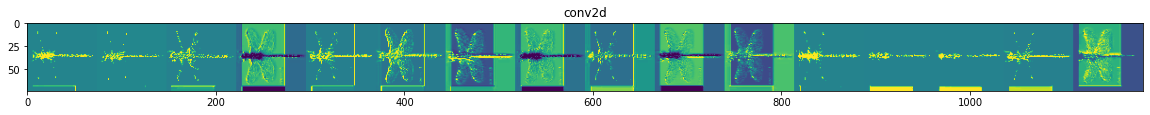

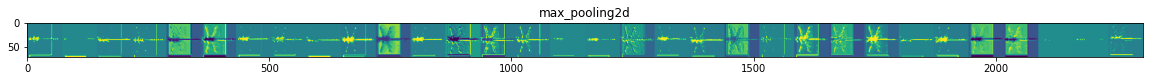

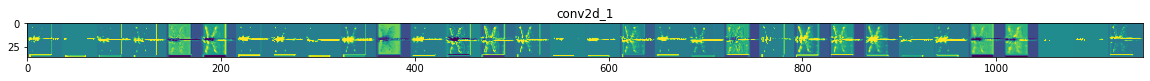

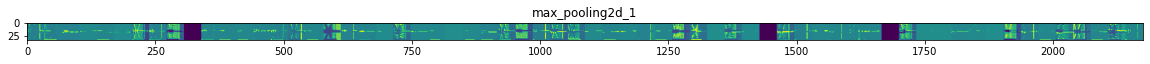

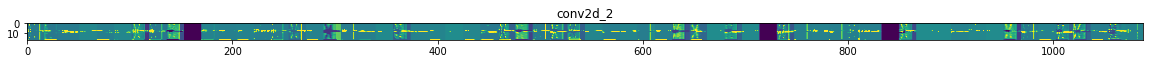

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a plane or no_plane from the training set.
plane_img_files = [os.path.join(train_planes_dir, f) for f in train_plane_fnames]
no_plane_img_files = [os.path.join(train_no_planes_dir, f) for f in train_no_plane_fnames]
img_path = random.choice(plane_img_files + no_plane_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (50, 50, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 50, 50, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

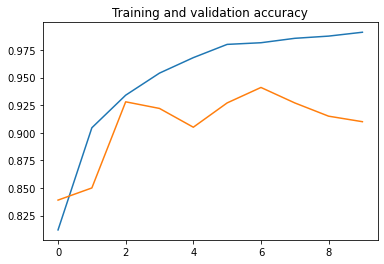

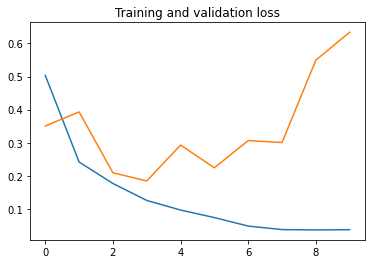

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# 3-2번 Adam

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 50x50
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=test_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
125/125 [==============================] - 50s 393ms/step - loss: 0.0397 - acc: 0.9886 - val_loss: 0.4081 - val_acc: 0.9280
Epoch 2/10
125/125 [==============================] - 49s 390ms/step - loss: 0.0151 - acc: 0.9959 - val_loss: 0.3517 - val_acc: 0.9330
Epoch 3/10
125/125 [==============================] - 48s 388ms/step - loss: 0.0077 - acc: 0.9978 - val_loss: 0.3363 - val_acc: 0.9360
Epoch 4/10
125/125 [==============================] - 48s 387ms/step - loss: 0.0755 - acc: 0.9855 - val_loss: 0.4766 - val_acc: 0.9090
Epoch 5/10
125/125 [==============================] - 48s 386ms/step - loss: 0.0175 - acc: 0.9934 - val_loss: 0.3631 - val_acc: 0.9300
Epoch 6/10
125/125 [==============================] - 48s 387ms/step - loss: 0.0049 - acc: 0.9973 - val_loss: 0.3782 - val_acc: 0.9430
Epoch 7/10
125/125 [==============================] - 48s 387ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3390 - val_acc: 0.9420
Epoch 8/10
125/125 [==============================] - 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


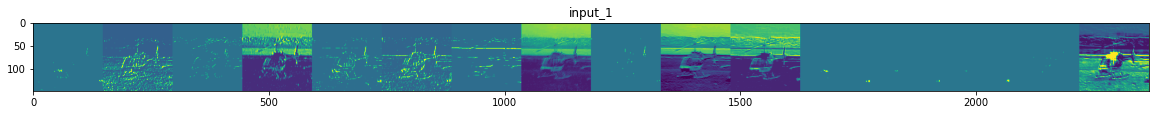

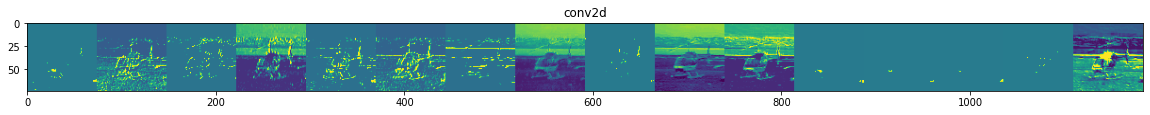

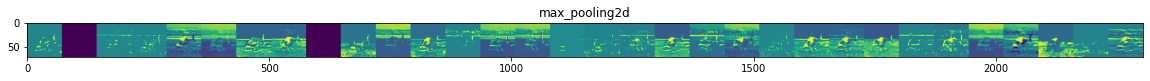

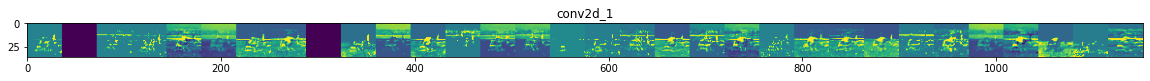

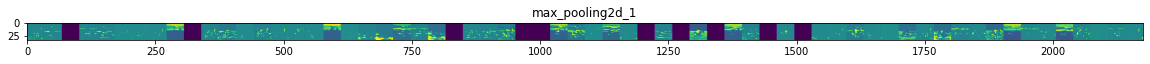

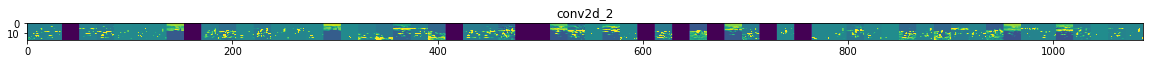

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a plane or no_plane from the training set.
plane_img_files = [os.path.join(train_planes_dir, f) for f in train_plane_fnames]
no_plane_img_files = [os.path.join(train_no_planes_dir, f) for f in train_no_plane_fnames]
img_path = random.choice(plane_img_files + no_plane_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (50, 50, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 50, 50, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

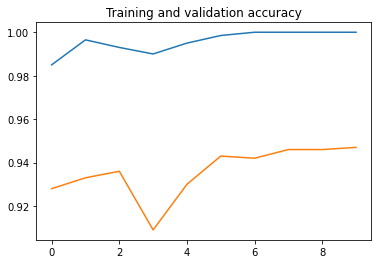

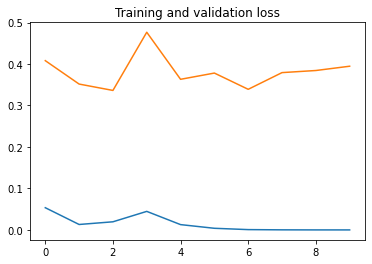

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# 3-3번 AdaGrad

In [ ]:
from tensorflow.keras.optimizers import Adagrad

model.compile(loss='binary_crossentropy',
              optimizer=Adagrad(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 50x50
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      epochs=10,
      validation_data=test_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
125/125 [==============================] - 49s 385ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4450 - val_acc: 0.9350
Epoch 2/10
125/125 [==============================] - 48s 382ms/step - loss: 7.3666e-04 - acc: 1.0000 - val_loss: 0.4451 - val_acc: 0.9360
Epoch 3/10
125/125 [==============================] - 48s 383ms/step - loss: 4.1622e-04 - acc: 1.0000 - val_loss: 0.4415 - val_acc: 0.9390
Epoch 4/10
125/125 [==============================] - 48s 386ms/step - loss: 2.0382e-04 - acc: 1.0000 - val_loss: 0.4437 - val_acc: 0.9410
Epoch 5/10
125/125 [==============================] - 48s 387ms/step - loss: 4.5532e-04 - acc: 1.0000 - val_loss: 0.4429 - val_acc: 0.9400
Epoch 6/10
125/125 [==============================] - 48s 381ms/step - loss: 4.5193e-04 - acc: 1.0000 - val_loss: 0.4450 - val_acc: 0.9400
Epoch 7/10
125/125 [==============================] - 48s 384ms/step - loss: 2.3171e-04 - acc: 1.0000 - val_loss: 0.4457 - val_acc: 0.9400
Epoch 8/10
125/125 [===========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


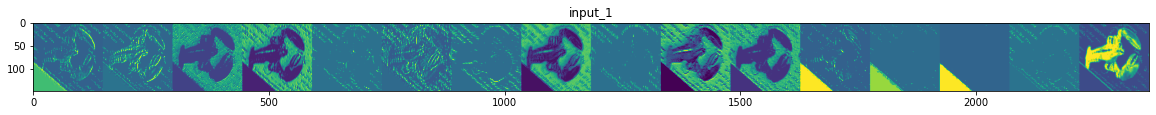

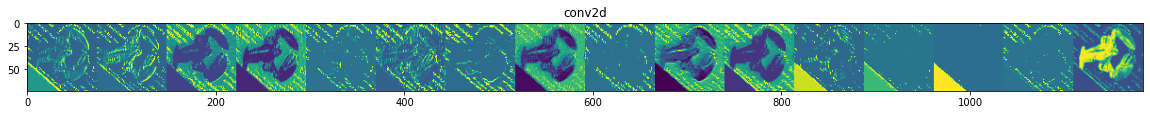

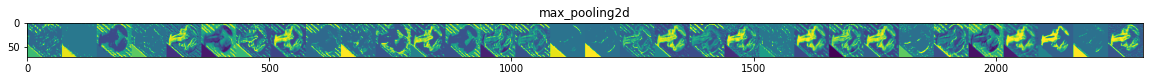

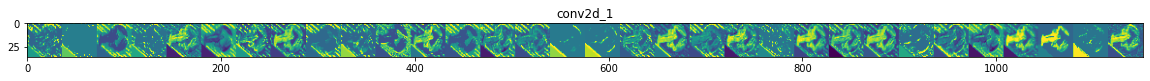

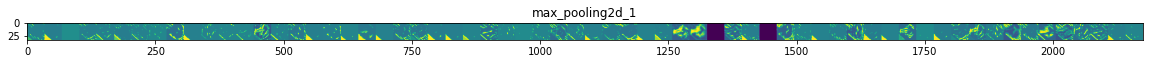

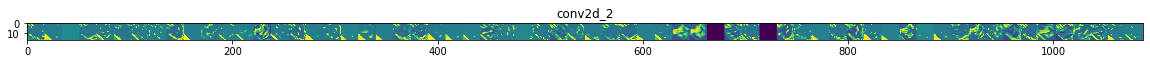

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a plane or no_plane from the training set.
plane_img_files = [os.path.join(train_planes_dir, f) for f in train_plane_fnames]
no_plane_img_files = [os.path.join(train_no_planes_dir, f) for f in train_no_plane_fnames]
img_path = random.choice(plane_img_files + no_plane_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (50, 50, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 50, 50, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

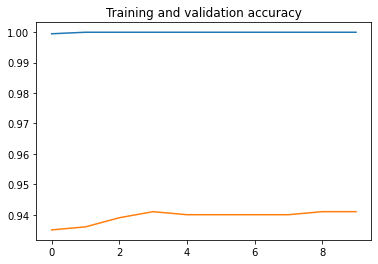

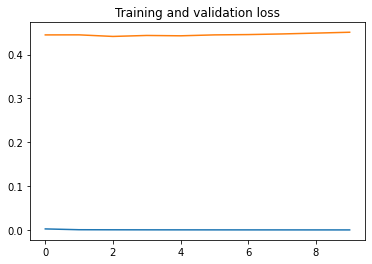

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')